# Introduction 
Using the CalEnviroScreen data set and the affordable housing projects data from Los Angeles Housing and Community Invesment Department, we map where in L.A County is affordable housing being built, and if there is an overlap with the areas of high environmental vulnerability and pollution exposure in the county.

# Getting Ready
we'll bring in all of our libraries that we need and then the Cal Envrio data, census tracts, and our affordable housing data.

## Import libraries 
These libraries help us explore our data and get it on maps

In [64]:
# for basic analysis on our data
import pandas as pd

# so we can analyze geographic data
import geopandas as gpd

# to plot things with plotly
import plotly.express as px

# for nice basemaps
import contextily as ctx

# for interactive leaflet mapping
import folium

# to handle thousands of markers
from folium.plugins import MarkerCluster

## LA census tracts

We'll start with our basic geojson [LA Census Trats](http://boundaries.latimes.com/set/census-tracts-2012/) file from the LA Times "Mapping L.A Boundaries" API dataset. This data set contains geometry for "statisical areas defined by the Census Bureau"

In [65]:
# Bring in the LA census tracts 
tracts= gpd.read_file('http://boundaries.latimes.com/1.0/boundary-set/census-tracts-2012/?format=geojson')
tracts.head()

,kind,external_id,name,slug,set,metadata,resource_uri,geometry
0,Census Tract (2012),06037101110,06037101110,06037101110-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2594737', 'NAME': '1011.10',...",/1.0/boundary/06037101110-census-tract-2012/,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,Census Tract (2012),06037101122,06037101122,06037101122-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2677213', 'NAME': '1011.22',...",/1.0/boundary/06037101122-census-tract-2012/,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,Census Tract (2012),06037101210,06037101210,06037101210-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2529724', 'NAME': '1012.10',...",/1.0/boundary/06037101210-census-tract-2012/,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,Census Tract (2012),06037101220,06037101220,06037101220-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2516085', 'NAME': '1012.20',...",/1.0/boundary/06037101220-census-tract-2012/,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,Census Tract (2012),06037101300,06037101300,06037101300-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2487732', 'NAME': '1013', 'I...",/1.0/boundary/06037101300-census-tract-2012/,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


In [66]:
#let's simplify it to just the columns we need
tracts_trimmed = tracts[['name','geometry']]
tracts_trimmed.head()

,name,geometry
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


In [67]:
# rename the columns
tracts_trimmed.columns = ['Census Tract','geometry']
tracts_trimmed.head()

,Census Tract,geometry
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


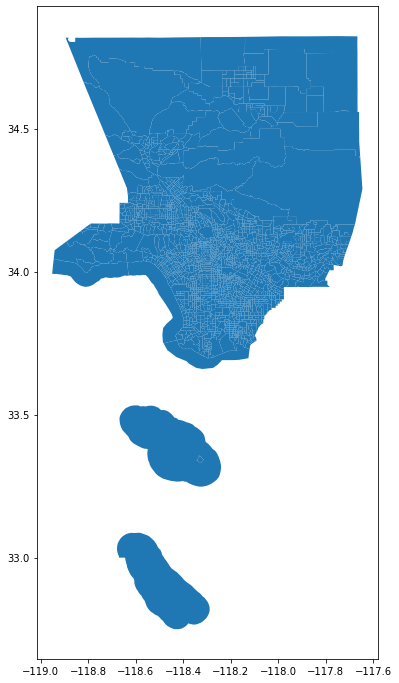

In [68]:
# Look at our map!
tracts_trimmed.plot(figsize=(12,12))


## Cal Enviro data 

This data set includes an index created by the California Environmental Agency and the Office of Environmental Hazard to define areas who have high vulnerability to climate change and are  highly exposed to different types of pollutants. The areas with the highest index scores are designated as “Disadvantaged Communities”, and are used as targeted areas for investments that aim to improve public health, quality of life, and economic opportunity in California. For the purposes of this project we use the term “vulnerable areas” instead of “disadvantaged communities”. The reason is that we do not want to characterize the population or community as "disadvantaged". We assume that the lack of investment in these areas has been a result of zoning and historic racist practices that have resulted in the disproportionate pollution of areas where Black, Indigenous and Brown communities live. 

In [69]:
# import Cal Enviro Screen Data Set
cal_enviro= pd.read_csv('data/CalEnviro_LA_County.csv')

# Look at the first 10 rows to get a sense of what the data is telling us
cal_enviro.head(10)

,Census Tract,CalEnviroScreen\n3.0 Score,CalEnviroScreen 3.0 \nPercentile Range,Pollution Burden\nPercentile,Population Characteristics\nPercentile,Total Population,California County,Approximate Zip Code,Nearby City \n(to help approximate location only)
0,6019001100,94.09,95-100% (highest scores),99.95,99.70,3174,Fresno,93706,Fresno
1,6071001600,90.68,95-100% (highest scores),100.00,98.11,6133,San Bernardino,91761,Ontario
2,6019000200,85.97,95-100% (highest scores),99.00,99.99,3167,Fresno,93706,Fresno
3,6077000801,82.49,95-100% (highest scores),99.59,97.72,6692,San Joaquin,95203,Stockton
4,6019001500,82.03,95-100% (highest scores),99.99,92.76,2206,Fresno,93725,Fresno
5,6037204920,80.73,95-100% (highest scores),99.88,94.89,2598,Los Angeles,90023,Los Angeles
6,6077000300,80.18,95-100% (highest scores),98.07,99.65,2396,San Joaquin,95203,Stockton
7,6019001000,80.13,95-100% (highest scores),97.35,99.91,4106,Fresno,93706,Fresno
8,6037206050,79.03,95-100% (highest scores),99.90,92.96,2146,Los Angeles,90023,Los Angeles
9,6019000400,78.53,95-100% (highest scores),99.48,95.71,6343,Fresno,93721,Fresno


In [70]:
# This changes the census tract column to be imported as a string
cal_enviro['Census Tract'] = cal_enviro['Census Tract'].astype(str)

# And now we add the zero at the begining of the Census Tract Column
cal_enviro['Census Tract'] = cal_enviro['Census Tract'].str.zfill(11)

# Let's take a look to check that it worked
cal_enviro.head(10)

,Census Tract,CalEnviroScreen\n3.0 Score,CalEnviroScreen 3.0 \nPercentile Range,Pollution Burden\nPercentile,Population Characteristics\nPercentile,Total Population,California County,Approximate Zip Code,Nearby City \n(to help approximate location only)
0,06019001100,94.09,95-100% (highest scores),99.95,99.70,3174,Fresno,93706,Fresno
1,06071001600,90.68,95-100% (highest scores),100.00,98.11,6133,San Bernardino,91761,Ontario
2,06019000200,85.97,95-100% (highest scores),99.00,99.99,3167,Fresno,93706,Fresno
3,06077000801,82.49,95-100% (highest scores),99.59,97.72,6692,San Joaquin,95203,Stockton
4,06019001500,82.03,95-100% (highest scores),99.99,92.76,2206,Fresno,93725,Fresno
5,06037204920,80.73,95-100% (highest scores),99.88,94.89,2598,Los Angeles,90023,Los Angeles
6,06077000300,80.18,95-100% (highest scores),98.07,99.65,2396,San Joaquin,95203,Stockton
7,06019001000,80.13,95-100% (highest scores),97.35,99.91,4106,Fresno,93706,Fresno
8,06037206050,79.03,95-100% (highest scores),99.90,92.96,2146,Los Angeles,90023,Los Angeles
9,06019000400,78.53,95-100% (highest scores),99.48,95.71,6343,Fresno,93721,Fresno


In [71]:
# Now we want to just simplify the data to only look at Los Angeles
enviro_LA= cal_enviro[cal_enviro['California County']== 'Los Angeles']

# Let's look at the head to make sure it worked.
enviro_LA.head(10)

,Census Tract,CalEnviroScreen\n3.0 Score,CalEnviroScreen 3.0 \nPercentile Range,Pollution Burden\nPercentile,Population Characteristics\nPercentile,Total Population,California County,Approximate Zip Code,Nearby City \n(to help approximate location only)
5,06037204920,80.73,95-100% (highest scores),99.88,94.89,2598,Los Angeles,90023,Los Angeles
8,06037206050,79.03,95-100% (highest scores),99.90,92.96,2146,Los Angeles,90023,Los Angeles
14,06037205120,78.04,95-100% (highest scores),99.75,93.44,3618,Los Angeles,90023,Los Angeles
16,06037291220,77.50,95-100% (highest scores),99.96,88.16,3353,Los Angeles,90247,Gardena
20,06037239202,76.04,95-100% (highest scores),96.91,99.23,4724,Los Angeles,90001,Los Angeles
21,06037226002,76.04,95-100% (highest scores),99.83,90.38,1604,Los Angeles,90021,Los Angeles
27,06037535400,74.46,95-100% (highest scores),97.41,97.96,3495,Los Angeles,90002,Los Angeles
31,06037243100,73.54,95-100% (highest scores),94.35,99.68,5350,Los Angeles,90059,Los Angeles
32,06037543305,73.54,95-100% (highest scores),99.76,88.26,2666,Los Angeles,90220,Compton
34,06037204600,73.13,95-100% (highest scores),98.53,94.83,4101,Los Angeles,90023,Los Angeles


In [72]:
# Let's rename a few of these columns to get the weird \n out of there.
enviro_LA=enviro_LA.rename(columns={"CalEnviroScreen\n3.0 Score": "Score", 
                          "CalEnviroScreen 3.0 \nPercentile Range": "Percentile Range",
                          "Pollution Burden\nPercentile" : "Burden Percentile",
                          "Population Characteristics\nPercentile" : "Characteristcs Percentile",
                          "Total Population" : "Population",
                          "Nearby City \n(to help approximate location only)" : "Nearby City"
                         })

#check out the renamed columns
enviro_LA.head(10)

,Census Tract,Score,Percentile Range,Burden Percentile,Characteristcs Percentile,Population,California County,Approximate Zip Code,Nearby City
5,06037204920,80.73,95-100% (highest scores),99.88,94.89,2598,Los Angeles,90023,Los Angeles
8,06037206050,79.03,95-100% (highest scores),99.90,92.96,2146,Los Angeles,90023,Los Angeles
14,06037205120,78.04,95-100% (highest scores),99.75,93.44,3618,Los Angeles,90023,Los Angeles
16,06037291220,77.50,95-100% (highest scores),99.96,88.16,3353,Los Angeles,90247,Gardena
20,06037239202,76.04,95-100% (highest scores),96.91,99.23,4724,Los Angeles,90001,Los Angeles
21,06037226002,76.04,95-100% (highest scores),99.83,90.38,1604,Los Angeles,90021,Los Angeles
27,06037535400,74.46,95-100% (highest scores),97.41,97.96,3495,Los Angeles,90002,Los Angeles
31,06037243100,73.54,95-100% (highest scores),94.35,99.68,5350,Los Angeles,90059,Los Angeles
32,06037543305,73.54,95-100% (highest scores),99.76,88.26,2666,Los Angeles,90220,Compton
34,06037204600,73.13,95-100% (highest scores),98.53,94.83,4101,Los Angeles,90023,Los Angeles


## Affordable Housing Data

Now we import the data we will analyze: ["HCIDLA Affordable Housing Projects List (2003 to Present)"](https://data.lacity.org/A-Livable-and-Sustainable-City/HCIDLA-Affordable-Housing-Projects-List-2003-to-Pr/mymu-zi3s)

According to the data description, this data set includes: 
>"HCIDLA financed projects since 2003 to present. These projects are financed with programs including Affordable Housing Managed Pipeline, Supportive Housing Program, Affordable Housing Bond Program, and the Proposition HHH Supportive Housing Loan Program."


In [73]:
# read in a CSV file downloaded from the HCIDLA
hcid=pd.read_csv('data/HCIDLA_AffordableHousing.csv')

# take a look at the first 5 rows to make sure it's 
hcid.head()

,APN,PROJECT NUMBER,NAME,DEVELOPMENT STAGE,CONSTRUCTION TYPE,SITE ADDRESS,SITE COUNCIL DISTRICT,SITE #,SITE COMMUNITY,SITE UNITS,...,MANAGEMENT COMPANY,CONTACT PHONE,PHOTO,JOBS,PROJECT SUMMARY URL,CONTRACT NUMBERS,DATE STAMP,SITE LONGITUDE,SITE LATITUDE,GPS_COORDS ON MAP
0,5131020009,05-117217,LEXINGTON APARTMENTS A/B (SITE 11),In-Service,REHAB,1145 E 24TH ST CA 90011,9,11,CENTRAL,0,...,"ALPHA PROPERTY MANAGEMENT, INC.",(323) 231-4174,click here (http://hcidapp.lacity.org/mpphotos...,NaN,click here (http://hcidapp.lacity.org/ahtfRepo...,NaN,09/09/2020 12:00:00 AM,-118.25561,34.02133,POINT (-118.25561000000002 34.02133)
1,5067008008,06-117222,WINDWARD APTS (A/B) (SITE 4),In-Service,REHAB,4817 W SATURN ST CA 90019,10,4,ST ELMO VILLAGE,6,...,"ALPHA PROPERTY MANAGEMENT, INC.",(323) 231-4174,click here (http://hcidapp.lacity.org/mpphotos...,NaN,click here (http://hcidapp.lacity.org/ahtfRepo...,NaN,09/09/2020 12:00:00 AM,-118.34217,34.04429,POINT (-118.34217 34.04429)
2,5108021026,13-120914,JUANITA TATE LEGACY TOWERS (RECAP),In-Service,ACQUISITION + REHAB,4827 S CENTRAL AVE 1-118 CA 90011,9,1,VERNON CENTRAL,118,...,CONCERNED CITIZENS OF SOUTH CENTRAL LOS ANGELES,NaN,click here (http://hcidapp.lacity.org/mpphotos...,92.0,click here (http://hcidapp.lacity.org/ahtfRepo...,NaN,09/09/2020 12:00:00 AM,-118.25668,33.99978,POINT (-118.25668 33.99978000000001)
3,5058024017,20289,LA 78 PRESERVATION PROJECT,In-Service,NaN,1951 W 22ND ST CA 90018,8,1,WEST ADAMS,20,...,"LEONARDO MANAGEMENT, INC.",(602) 350-2931,click here (http://hcidapp.lacity.org/mpphotos...,NaN,click here (http://hcidapp.lacity.org/ahtfRepo...,NaN,09/09/2020 12:00:00 AM,-118.30509,34.03651,POINT (-118.30509000000002 34.03651)
4,2218023009,12-119044,HAZELTINE & WYANDOTTE (SITE 2),In-Service,ACQUISITION + REHAB,"14630 W WYANDOTTE ST VAN NUYS, CA 91405",6,2,VAN NUYS,73,...,IRONWOOD COMPANY,(818) 789-5550,click here (http://hcidapp.lacity.org/mpphotos...,41.0,click here (http://hcidapp.lacity.org/ahtfRepo...,NaN,09/09/2020 12:00:00 AM,-118.45222,34.20289,POINT (-118.45222000000001 34.20289)


In [74]:
# List the names of all the columns so we can clean them
hcid_columns = list(hcid) 
hcid_columns

['APN',
 'PROJECT NUMBER',
 'NAME',
 'DEVELOPMENT STAGE',
 'CONSTRUCTION TYPE',
 'SITE ADDRESS',
 'SITE  COUNCIL DISTRICT',
 'SITE #',
 'SITE COMMUNITY',
 'SITE UNITS',
 'PROJECT TOTAL UNITS',
 'HOUSING TYPE',
 'SUPPORTIVE HOUSING',
 'DATE FUNDED',
 'HCIDLA FUNDED',
 'LEVERAGE',
 'TAX EXEMPT CONDUIT BOND',
 'TDC',
 'IN-SERVICE DATE',
 'DEVELOPER',
 'MANAGEMENT COMPANY',
 'CONTACT PHONE',
 'PHOTO',
 'JOBS',
 'PROJECT SUMMARY URL',
 'CONTRACT NUMBERS',
 'DATE STAMP',
 'SITE LONGITUDE',
 'SITE LATITUDE',
 'GPS_COORDS ON MAP']

In [75]:
# Create a trimmed down version of the data using only columns we're interested in
hcid_trim = hcid[[
    'NAME',
    'SITE ADDRESS',
    'SITE COMMUNITY',
    'HOUSING TYPE',
    'SUPPORTIVE HOUSING',
    'SITE LONGITUDE',
    'SITE LATITUDE',
    'DATE FUNDED',
    'IN-SERVICE DATE',
]]
# show a preview of the first 5 rows.
hcid_trim.head()

,NAME,SITE ADDRESS,SITE COMMUNITY,HOUSING TYPE,SUPPORTIVE HOUSING,SITE LONGITUDE,SITE LATITUDE,DATE FUNDED,IN-SERVICE DATE
0,LEXINGTON APARTMENTS A/B (SITE 11),1145 E 24TH ST CA 90011,CENTRAL,FAMILY,No,-118.25561,34.02133,12/28/2005,2006
1,WINDWARD APTS (A/B) (SITE 4),4817 W SATURN ST CA 90019,ST ELMO VILLAGE,FAMILY,No,-118.34217,34.04429,04/01/2006,2007
2,JUANITA TATE LEGACY TOWERS (RECAP),4827 S CENTRAL AVE 1-118 CA 90011,VERNON CENTRAL,SENIORS,No,-118.25668,33.99978,12/22/2014,2016
3,LA 78 PRESERVATION PROJECT,1951 W 22ND ST CA 90018,WEST ADAMS,NaN,No,-118.30509,34.03651,12/23/2002,2004
4,HAZELTINE & WYANDOTTE (SITE 2),"14630 W WYANDOTTE ST VAN NUYS, CA 91405",VAN NUYS,FAMILY,No,-118.45222,34.20289,12/02/2013,2014


# Charting Data

Create a few basic charts to get a look at our data and discover some trends

## Which census tracts have the highest scores?

We took a closer look at the Census Tracts that had the highest environmental vulnerability score. Not surprisingly, the top 10 census tracts are located in the areas in close proximity to freeway intersections in the neighborhood of East Los Angeles, South Los Angeles, and Glendale on the north side.

In [113]:
# Create a figure from the Enviro LA data frame where the score is greater than 73.12 (the top 10)
fig = px.bar(enviro_LA.head(20), 
            x='Census Tract', 
            y='Score', 
            hover_data=['Score'], 
            color='Score',  
            height=500,
            title='Top 20 census tracts with the highest Cal Enviro Screen Scores'
            )

# force the chart to show the census tract as a category <--- THIS IS THE MAGIC TRICK THAT MAKES IT WORK
fig.update_layout(xaxis=dict(type='category'))

fig.show()

## Where is the most affordable housing located in Los Angeles?

We found that the neighborhood of Westlake has the highest number of affordable housing projects financed by HCIDLA with a total of 34 housing projects, followed by the Wholesale District and the Central [district?], which have 23 and 19 projects respectively. Twenty-two site communities only have one housing project built since 2003.


In [77]:
# Now make a data frame that summarizes the number of projects in each community
hcid_community = hcid['SITE COMMUNITY'].value_counts().reset_index()

# Adjust the column headers so the names match the values below
hcid_community.columns = ['Site Community', 'Count']

# Show me the top 20
hcid_community.head(50)

,Site Community,Count
0,WESTLAKE,34
1,WHOLESALE DISTRICT,23
2,CENTRAL,19
3,HOLLYWOOD,17
4,EXPOSITION PARK,16
5,TEMPLE-BEAUDRY,15
6,UNIVERSITY PARK,14
7,WEST VERNON,14
8,PICO-UNION,14
9,MELROSE,14


In [78]:
hcid_community.tail(50)

,Site Community,Count
33,THAI TOWN,5
34,RESEDA,5
35,HISTORIC FILIPINOTOWN,5
36,WILMINGTON,5
37,VALLEY GLEN,5
38,NORTH HOLLYWOOD,4
39,PACOIMA,4
40,VICTORIA PARK,4
41,GLASSELL PARK,4
42,CHINATOWN,3


In [115]:
# Make a bar graph of communities with more than 6 projects
px.bar(hcid_community[hcid_community['Count'] > 6],
       x='Site Community',
       y='Count',
       title='Top 30 communitities in the City of LA with HCIDLA Affordable Housing Projects',
      )

## What type of housing is being built in each community?
    
The most common types of housing projects built accross all the neighborhoods are family and special needs housing. The latter is housing that directly serves individuals and families with either an intellectual or physical disability, and individuals who are experiencing houselessness, or chronic illness.

In [80]:
hcid_comm_type = hcid[[
 'NAME',
 'SITE COMMUNITY',
 'HOUSING TYPE',
]]

# group by site community and housing type, and let's get a count for each
hcid_grouped=hcid_comm_type.groupby(['SITE COMMUNITY','HOUSING TYPE']).count()[['NAME']]
hcid_grouped.head()

NAME
SITE COMMUNITY   HOUSING TYPE      
ADAMS-NORMANDIE  FAMILY           1
                 SENIORS          1
ALSACE           FAMILY           1
ANGELINO HEIGHTS FAMILY           1
ATWATER VILLAGE  FAMILY           5

In [81]:
# flatten the multi-indexed dataframe
hcid_flat = hcid_grouped.reset_index()
hcid_flat

,SITE COMMUNITY,HOUSING TYPE,NAME
0,ADAMS-NORMANDIE,FAMILY,1
1,ADAMS-NORMANDIE,SENIORS,1
2,ALSACE,FAMILY,1
3,ANGELINO HEIGHTS,FAMILY,1
4,ATWATER VILLAGE,FAMILY,5
...,...,...,...
167,WHOLESALE DISTRICT,SPECIAL NEEDS,17
168,WILMINGTON,FAMILY,3
169,WILMINGTON,SENIORS,2
170,WILSHIRE CENTER,FAMILY,3


In [82]:
# make a bar chart
px.bar(hcid_flat,  
       x='SITE COMMUNITY',
       y='NAME',
       color='HOUSING TYPE', # this creates the "stack"
       title='HCIDLA Affordable Housing Projects by Housing Type'
      )

# Merging Data 

Now we start to merge some of our data together, starting with the Cal Enviro Score and the Census Tracts data set that includes the latitude and longitud information, as well as the geographic polygon; which we need in order to create our thematic maps. 

In [83]:
# create a new dataframe based on the join
combined_enviro_tracts=tracts_trimmed.merge(enviro_LA,on="Census Tract")

# show me the first 5 to make sure it worked
combined_enviro_tracts.head()

,Census Tract,geometry,Score,Percentile Range,Burden Percentile,Characteristcs Percentile,Population,California County,Approximate Zip Code,Nearby City
0,06037104103,"MULTIPOLYGON (((-118.40085 34.28159, -118.3952...",45.29,80-85%,73.07,80.78,4085,Los Angeles,91342,Sylmar
1,06037104108,"MULTIPOLYGON (((-118.40853 34.27071, -118.3976...",43.88,80-85%,78.44,73.25,5256,Los Angeles,91331,Pacoima
2,06037104203,"MULTIPOLYGON (((-118.41799 34.27964, -118.4114...",40.88,75-80%,55.15,84.56,5210,Los Angeles,91331,Pacoima
3,06037104204,"MULTIPOLYGON (((-118.41142 34.28443, -118.4074...",40.03,75-80%,79.50,63.83,3375,Los Angeles,91342,Sylmar
4,06037104310,"MULTIPOLYGON (((-118.44011 34.26727, -118.4357...",59.68,95-100% (highest scores),96.63,81.31,4921,Los Angeles,91331,Pacoima


In [84]:
# Now let's sort the data 
combined_sorted = combined_enviro_tracts.sort_values(by='Score',ascending = False)

# Take a look at it
combined_sorted.head()

,Census Tract,geometry,Score,Percentile Range,Burden Percentile,Characteristcs Percentile,Population,California County,Approximate Zip Code,Nearby City
221,06037204920,"MULTIPOLYGON (((-118.20281 34.01401, -118.2028...",80.73,95-100% (highest scores),99.88,94.89,2598,Los Angeles,90023,Los Angeles
227,06037206050,"MULTIPOLYGON (((-118.22278 34.01525, -118.2271...",79.03,95-100% (highest scores),99.90,92.96,2146,Los Angeles,90023,Los Angeles
223,06037205120,"MULTIPOLYGON (((-118.21993 34.01510, -118.2202...",78.04,95-100% (highest scores),99.75,93.44,3618,Los Angeles,90023,Los Angeles
458,06037291220,"MULTIPOLYGON (((-118.29090 33.87287, -118.2912...",77.50,95-100% (highest scores),99.96,88.16,3353,Los Angeles,90247,Gardena
409,06037239202,"MULTIPOLYGON (((-118.27393 33.98333, -118.2739...",76.04,95-100% (highest scores),96.91,99.23,4724,Los Angeles,90001,Los Angeles


# Mapping Data

## Cal Enviroscreen Map

First we are mapping all the census tracts that have a CalEnviro index score. We noticed that the majority of census tracts have a score above 40 points. There are a total of 3735 census tracts in L.A County, 1038 or 28 percent of the total were given a score, and are mostly concentrated in L.A City.  
We set the vertical axis legend starting at zero in order to show that there are no census tracts with a score below 40 points. 

In [85]:
# reproject to web mercator
combined_sorted = combined_sorted.to_crs(epsg=3857)

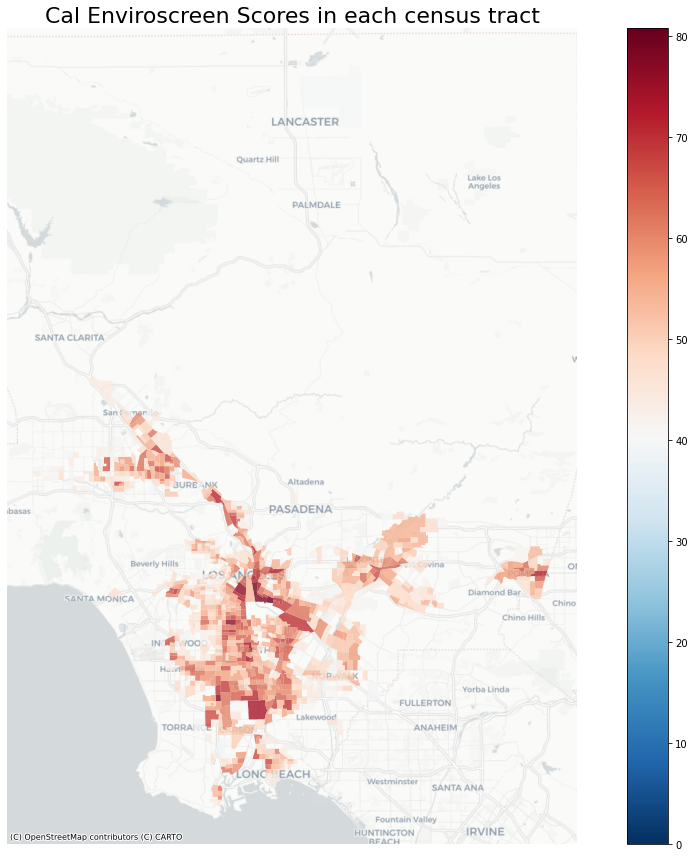

In [86]:
# Now we plot it on a map with a different color gradient
ax = combined_sorted.plot(figsize=(18,15),
                        column='Score',
                        legend=True,
                        alpha=0.8,
                        cmap='RdBu_r',    
                        vmin=0)

ax.axis('off')
ax.set_title('Cal Enviroscreen Scores in each census tract',fontsize=22)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

## Affordable housing map

The Affordable housing scatter plot map displays all affordable housing types funded by HCILDA and built since 2003. 

In [87]:
# there are null values in the Housing Type column, let's fill them out first
hcid['HOUSING TYPE'] = hcid['HOUSING TYPE'].fillna('unknown')

In [88]:
# plot the family housing
fig = px.scatter_mapbox(hcid,
                        lat="SITE LATITUDE",
                        lon="SITE LONGITUDE",
                        hover_name="HOUSING TYPE", 
                        color="HOUSING TYPE",
                        hover_data=["HOUSING TYPE", "SITE ADDRESS"], 
                        mapbox_style="carto-positron",
                        title='Affordable Housing Projects Funded by HCIDLA'
                        )
# show the map
fig.show()

# Creating a Function

Create a function that maps a specific census tract. First we'll work on each piece of it to make sure it works before putting together the complete function


In [89]:
# subset the Cal Enviro geodataframe for a single census tract
singledtract = combined_sorted[combined_sorted['Census Tract']=='06037204920']
singledtract 

,Census Tract,geometry,Score,Percentile Range,Burden Percentile,Characteristcs Percentile,Population,California County,Approximate Zip Code,Nearby City
221,06037204920,"MULTIPOLYGON (((-13158276.842 4030683.113, -13...",80.73,95-100% (highest scores),99.88,94.89,2598,Los Angeles,90023,Los Angeles


In [90]:
# reproject to web mercator
combined_sorted = combined_sorted.to_crs(epsg=3857)

In [91]:
# use the bounding box coordinates to set the x and y limits
minx, miny, maxx, maxy = singledtract.geometry.total_bounds

In [92]:
hcid.head()

,APN,PROJECT NUMBER,NAME,DEVELOPMENT STAGE,CONSTRUCTION TYPE,SITE ADDRESS,SITE COUNCIL DISTRICT,SITE #,SITE COMMUNITY,SITE UNITS,...,MANAGEMENT COMPANY,CONTACT PHONE,PHOTO,JOBS,PROJECT SUMMARY URL,CONTRACT NUMBERS,DATE STAMP,SITE LONGITUDE,SITE LATITUDE,GPS_COORDS ON MAP
0,5131020009,05-117217,LEXINGTON APARTMENTS A/B (SITE 11),In-Service,REHAB,1145 E 24TH ST CA 90011,9,11,CENTRAL,0,...,"ALPHA PROPERTY MANAGEMENT, INC.",(323) 231-4174,click here (http://hcidapp.lacity.org/mpphotos...,NaN,click here (http://hcidapp.lacity.org/ahtfRepo...,NaN,09/09/2020 12:00:00 AM,-118.25561,34.02133,POINT (-118.25561000000002 34.02133)
1,5067008008,06-117222,WINDWARD APTS (A/B) (SITE 4),In-Service,REHAB,4817 W SATURN ST CA 90019,10,4,ST ELMO VILLAGE,6,...,"ALPHA PROPERTY MANAGEMENT, INC.",(323) 231-4174,click here (http://hcidapp.lacity.org/mpphotos...,NaN,click here (http://hcidapp.lacity.org/ahtfRepo...,NaN,09/09/2020 12:00:00 AM,-118.34217,34.04429,POINT (-118.34217 34.04429)
2,5108021026,13-120914,JUANITA TATE LEGACY TOWERS (RECAP),In-Service,ACQUISITION + REHAB,4827 S CENTRAL AVE 1-118 CA 90011,9,1,VERNON CENTRAL,118,...,CONCERNED CITIZENS OF SOUTH CENTRAL LOS ANGELES,NaN,click here (http://hcidapp.lacity.org/mpphotos...,92.0,click here (http://hcidapp.lacity.org/ahtfRepo...,NaN,09/09/2020 12:00:00 AM,-118.25668,33.99978,POINT (-118.25668 33.99978000000001)
3,5058024017,20289,LA 78 PRESERVATION PROJECT,In-Service,NaN,1951 W 22ND ST CA 90018,8,1,WEST ADAMS,20,...,"LEONARDO MANAGEMENT, INC.",(602) 350-2931,click here (http://hcidapp.lacity.org/mpphotos...,NaN,click here (http://hcidapp.lacity.org/ahtfRepo...,NaN,09/09/2020 12:00:00 AM,-118.30509,34.03651,POINT (-118.30509000000002 34.03651)
4,2218023009,12-119044,HAZELTINE & WYANDOTTE (SITE 2),In-Service,ACQUISITION + REHAB,"14630 W WYANDOTTE ST VAN NUYS, CA 91405",6,2,VAN NUYS,73,...,IRONWOOD COMPANY,(818) 789-5550,click here (http://hcidapp.lacity.org/mpphotos...,41.0,click here (http://hcidapp.lacity.org/ahtfRepo...,NaN,09/09/2020 12:00:00 AM,-118.45222,34.20289,POINT (-118.45222000000001 34.20289)


<div class="alert alert-danger">
The hcid data is in decimal degrees (4326), so when you bring it in, you need to define the crs as 'EPSG:3857'. THEN, you can convert it to web mercator (3857).
</div>

In [93]:
# convert pandas dataframe to geodataframe
hcid_geo = gpd.GeoDataFrame(hcid, 
                         crs='EPSG:4326', #Changed from 4326 
                         geometry=gpd.points_from_xy(hcid['SITE LONGITUDE'], 
                                                     hcid['SITE LATITUDE']))



In [94]:
hcid_geo = hcid_geo.to_crs('EPSG:3857')

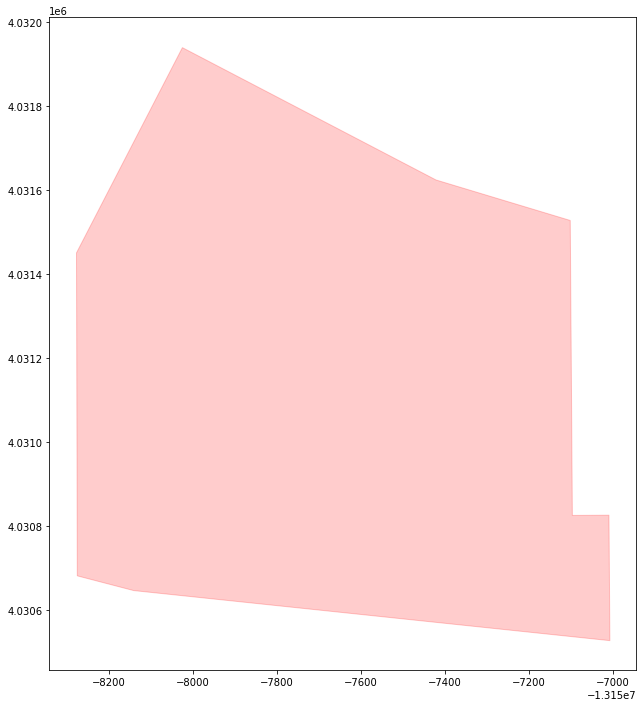

In [95]:
# define the base layer to be the neighborhood polygon
basetract = singledtract.plot(figsize=(12,12),
                             color='red', 
                             edgecolor='red',
                             alpha=0.2)

When we mapped the singled out census tract with the singled out census tract there was no data showing- We assumed that no housing was present in that census tract, but our gdp joined data frame had no rows. After projecting the

In [96]:
# do a spatial join to get affordable housing in census tract
housing_in_tract = gpd.sjoin(hcid_geo,singledtract,how='inner')

housing_in_tract

,APN,PROJECT NUMBER,NAME,DEVELOPMENT STAGE,CONSTRUCTION TYPE,SITE ADDRESS,SITE COUNCIL DISTRICT,SITE #,SITE COMMUNITY,SITE UNITS,...,index_right,Census Tract,Score,Percentile Range,Burden Percentile,Characteristcs Percentile,Population,California County,Approximate Zip Code,Nearby City
302,5191012020,12-118877,BESWICK SENIOR APARTMENTS,In-Service,NEW CONSTRUCTION,3553 E BESWICK ST CA 90023,14,1,BOYLE HEIGHTS,33,...,221,06037204920,80.73,95-100% (highest scores),99.88,94.89,2598,Los Angeles,90023,Los Angeles


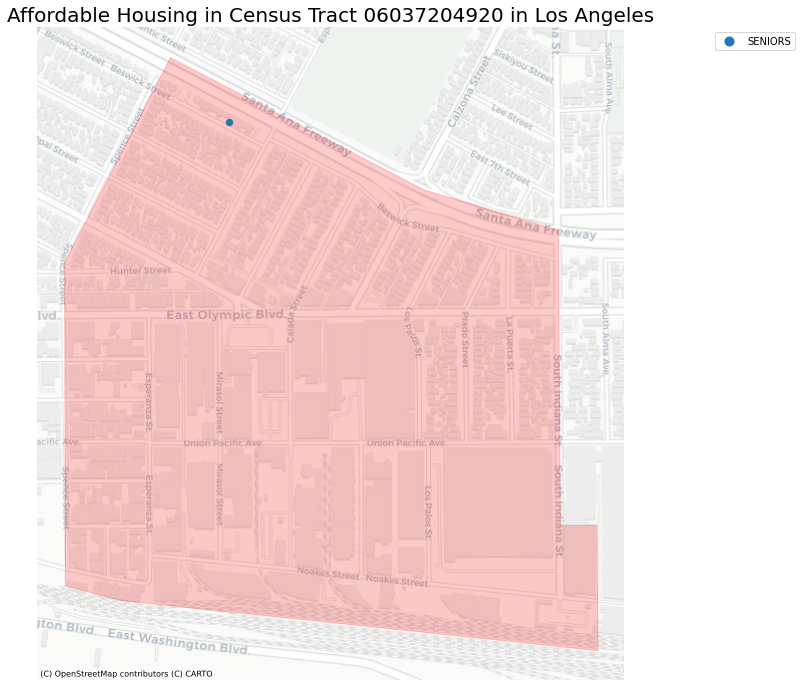

In [97]:
# define the base layer to be the neighborhood polygon
basetract = singledtract.plot(figsize=(12,12),
                             color='red', 
                             edgecolor='red',
                             alpha=0.2)

ax = housing_in_tract.plot(ax=basetract, 
    column='HOUSING TYPE',
    markersize=40, 
    legend=True,
    cmap='tab20',
    legend_kwds={
       'loc': 'upper right',
       'bbox_to_anchor':(1.3,1)
    }                  # this puts the legend to the side
)

# turn off the axis
ax.axis('off')

# add a title
ax.set_title('Affordable Housing in Census Tract '+housing_in_tract['Census Tract'].values[0]+' in Los Angeles',fontsize=20)


# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)
ax

## Combining the Housing and the Vulnerabilty score into one function

In [98]:
def map_housing_by_tract(place='06037204920'):
    
    global combined_sorted

    # reproject to web mercator
    combined_sorted = combined_sorted.to_crs(epsg=3857)
      

    # subset the Cal Enviro geodataframe for a single census tract
    singledtract = combined_sorted[combined_sorted['Census Tract']==place]
    
       
    # use the bounding box coordinates to set the x and y limits
    minx, miny, maxx, maxy = singledtract.geometry.total_bounds
    
    # convert pandas dataframe to geodataframe
    hcid_geo = gpd.GeoDataFrame(hcid, 
                         crs='EPSG:4326', #Changed from 4326 
                         geometry=gpd.points_from_xy(hcid['SITE LONGITUDE'], 
                                                     hcid['SITE LATITUDE']))
    # creating a geodata frame and projecting it to EPSG:3857
    hcid_geo = hcid_geo.to_crs('EPSG:3857')
    
    # define the base layer to be the neighborhood polygon
    basetract = singledtract.plot(figsize=(12,12),
                             color='red', 
                             edgecolor='red',
                             alpha=0.2)
    # do a spatial join to get affordable housing in census tract
    housing_in_tract = gpd.sjoin(hcid_geo,singledtract,how='inner')
    
    # define the base layer to be the neighborhood polygon
    basetract = singledtract.plot(figsize=(12,12),
                             color='red', 
                             edgecolor='red',
                             alpha=0.2)

    ax = housing_in_tract.plot(ax=basetract, 
        column='HOUSING TYPE',
        markersize=40, 
        legend=True,
        cmap='tab20',
        legend_kwds={
           'loc': 'upper right',
           'bbox_to_anchor':(1.3,1)
        }                  # this puts the legend to the side
    )

    # turn off the axis
    ax.axis('off')

    # add a title
    ax.set_title('Affordable Housing in Census Tract '+housing_in_tract['Census Tract'].values[0]+' in Los Angeles',fontsize=20)


    # add a basemap
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)
    ax


<div class="alert alert-danger">
There is some redundant code, so a little clean up is necessary.
    
Also, the error is because the spatial join does not return any HCID records. Add an if statement to capture this.
</div>

In [99]:
#Second function run attempt

def map_housing_by_tract(place='06037204920'):
    
    # subset the Cal Enviro geodataframe for a single census tract
    singledtract = combined_sorted[combined_sorted['Census Tract']==place]
       
    # use the bounding box coordinates to set the x and y limits
    minx, miny, maxx, maxy = singledtract.geometry.total_bounds
    
    # convert pandas dataframe to geodataframe
    hcid_geo = gpd.GeoDataFrame(hcid, 
                         crs='EPSG:4326', #Changed from 4326 
                         geometry=gpd.points_from_xy(hcid['SITE LONGITUDE'], 
                                                     hcid['SITE LATITUDE']))

    # creating a geodata frame and projecting it to EPSG:3857
    hcid_geo = hcid_geo.to_crs('EPSG:3857')
    
    # do a spatial join to get affordable housing in census tract
    housing_in_tract = gpd.sjoin(hcid_geo,singledtract,how='inner')

    # only draw a map if it returns more than one record
    if len(housing_in_tract)> 0:
        # define the base layer to be the neighborhood polygon
        basetract = singledtract.plot(figsize=(12,12),
                                 color='red', 
                                 edgecolor='red',
                                 alpha=0.2)

        ax = housing_in_tract.plot(ax=basetract, 
            column='HOUSING TYPE',
            markersize=40, 
            legend=True,
            cmap='tab20',
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1.3,1)
            }                  # this puts the legend to the side
        )

        # turn off the axis
        ax.axis('off')

        # add a title
        ax.set_title('Affordable Housing in Census Tract '+housing_in_tract['Census Tract'].values[0]+' in Los Angeles',fontsize=20)


        # add a basemap
        ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)
        ax
    
    # no records found
    else:
        print('No records found.')
        


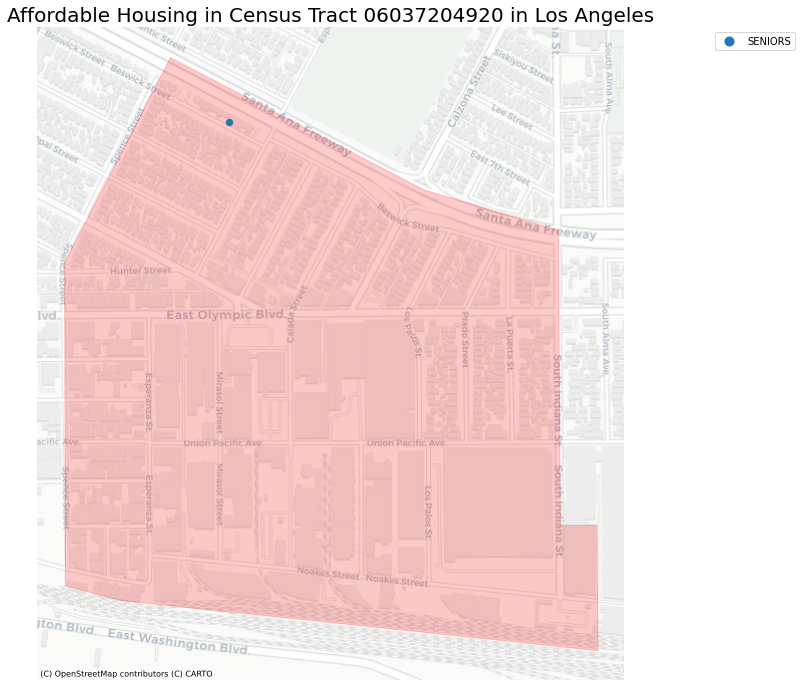

In [100]:
# call the function!
map_housing_by_tract(place='06037204920')

In [101]:
# call the function!
map_housing_by_tract(place='06037291220')

No records found.


## Trying our function with the census tracts with the highest CalEnviro Score

We run this function for all of the top 10 census tracts, and only one of them showed a housing project withing its boundary. This leads to our preliminary conclusion that not sufficient affordable housing is being built in the top most vulnerable census tracts.

In [102]:
# Highest score census tract at 99.04
map_housing_by_tract(place='06019001100')

No records found.


In [103]:
# Highest score census tract at 94.90
map_housing_by_tract(place='6071001600')

No records found.


In [104]:
# Highest score census tract at 85.97
map_housing_by_tract(place='6019000200')

No records found.


In [105]:
# Highest score census tract at 85.97
map_housing_by_tract(place='6077000801')

No records found.


In [106]:
# Highest score census tract at 82.03
map_housing_by_tract(place='6019001500')

No records found.


In [107]:
# Highest score census tract at 80.18
map_housing_by_tract(place='6077000300')

No records found.


In [108]:
# Highest score census tract at 80.13
map_housing_by_tract(place='6019001000')

No records found.


In [109]:
# Highest score census tract at 79.03
map_housing_by_tract(place='6037206050')

No records found.


In [110]:
# Highest score census tract at 78.53
map_housing_by_tract(place='6019000400')

No records found.


## Testing this function with a random census tract
We run one other random census tract and it shows one senior project and one family project. With this random run test, we know that the function is working, but only with the census tracts that do have at least one affordable housing project. 

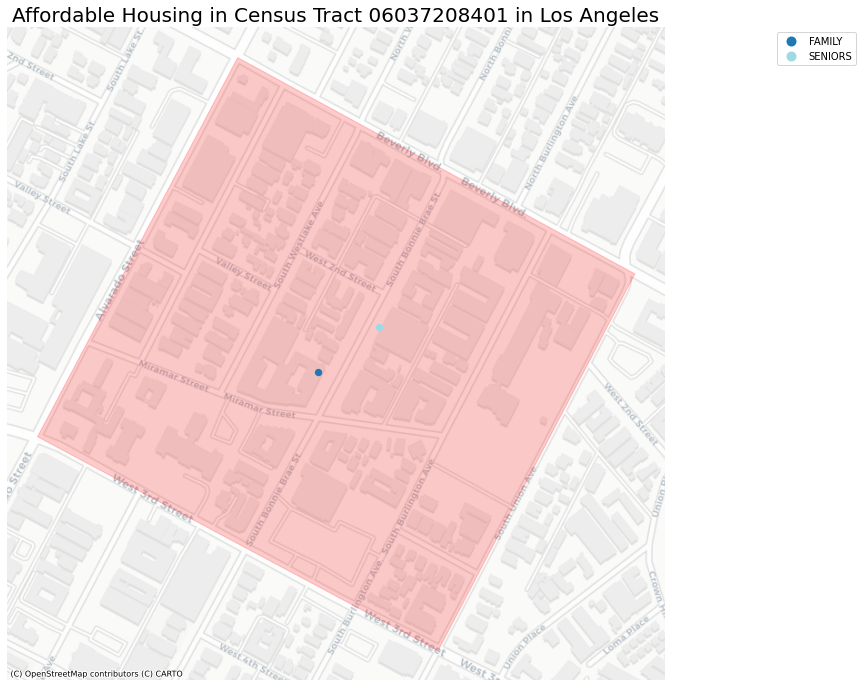

In [111]:
# random census tract in the Westlake area
map_housing_by_tract(place='06037208401')



# Next Steps

We hope to create a loop with the above function that would automatically map the top 10 census tracts with the highest vulnerability score and that shows the housing projects. 
In addition, we also want to include an interactive map with the clusters of projects overlaid on the Cal Enviro / Vulnerability census tracts  map.

# Division of Labor 

**Jayne**

* Worked on the initial data related to HCID LA's affordable housing projects.

* Merged the Cal Enviro / Census Tract notebook with the Affordable Housing notebook into one and created a clean unified notebook for us to build on. 

* Worked with Laura to create a map that shows a specific census tract with the location of affordable housing projects in that tract

* Worked with Laura to create a function so we can easily do this for different census tracts.

**Laura**

* Drafted and inserted the markdown cells with the narrative of our project. 

* Updated data links to personal notebook and updated the API address with Census tracts base map on the notebook.

* Collaborated with Jayne to create our function to map singled out census tracts and housing projects, and trouble-shooted issues. 

* Run the function for the top ten census tracts with the highest vulnerability score.

* Wrote conclusions and next steps. 

    